# Supervised learning: predicting an output variable from high-dimensional observations
<br>
https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

## The problem solved in supervise learning

Supervised learning consist of learning the relationship between two data sets, your independent data X, and dependent data y. y is what we are trying to predict.

All supervised <b>estimators</b> in scikit-learn us a 
<br>fit(X,y) method to fit the model and 
<br>predict(X) method, that will 
<br>predict labels y 
<br>given unlabled observation X

Basically, given two datasets, X and y variables, where X is your dependent varialbe and y is your independent variable, what you are trying to predict. We split X and y into training and test datasets, respectully. We we select some number of X and y, and pass them to the fit method, so that it generates some sort model that best fit your two dataset. Then you and pass the remaining X values to try to predict what y would have been, X^ your predicted value. You compare your y with X^ and see how well your model predicted the values.

## Classification And Regression

A classification model is one where you have to classify the observation into finite labels, discrete values, something difinitive, red, green, human, anmimal, ect. 

A regression model is one where you have to make a prediction where the outcome can be infinite, continuous values, very specific outcome, salary, $150,012.4292, height, 5ft 22.2355in.

## Nearest Neighbor and The Curse of Dimensionality

In this exercise we are going to attempt to classify iris base on their sepal length, sepal width, petal length, petal width.
<br>Setosa have narror short petals and short sepal (small)
<br>Vericolor have wide petals and sepal (medium)
<br>Virginica have long narror petals and long sepal (large)


In [62]:
#From Scikit learn we are going to import the iris data set
from sklearn import datasets
import numpy as np
#This will load all the iris data including meta data about the data set
iris = datasets.load_iris()
#If we only want to see the data for iris
irisData = iris.data
irisData[0:15]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

In [63]:
#To see the target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [64]:
#Then the target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [65]:
#We know that the first 50 of the data set are classified as setosa, the next fifty are versicolor and the last fifty are virginica
#from the target_names array
iris.target.tolist().count(0)


50

In [66]:
#If we look at the 1st, 51st and 101st element of the data array, we can have an idea of length and width of the pedal and sepal
#for each of the iris names
#Setosa
iris.data[0]


array([5.1, 3.5, 1.4, 0.2])

In [67]:
#Versicolor
iris.data[51]

array([6.4, 3.2, 4.5, 1.5])

In [68]:
#Virginica
iris.data[101]

array([5.8, 2.7, 5.1, 1.9])

We can see the numbers get somewhat larger, if you print out the entire data set it would be more clear that the the dataset is increasing

In [69]:
#We can split the iris dataset into our training and test data
#iris_X is going to contain all 150 of our iris datase
#iris_y is going to contain all 150 of our target
iris_X, iris_y = datasets.load_iris(return_X_y=True)
iris_X[0:10]
iris_y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
#Generate 150 random number, permutation means to generate/permute a sequence of numbers
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
indices

array([114,  62,  33, 107,   7, 100,  40,  86,  76,  71, 134,  51,  73,
        54,  63,  37,  78,  90,  45,  16, 121,  66,  24,   8, 126,  22,
        44,  97,  93,  26, 137,  84,  27, 127, 132,  59,  18,  83,  61,
        92, 112,   2, 141,  43,  10,  60, 116, 144, 119, 108,  69, 135,
        56,  80, 123, 133, 106, 146,  50, 147,  85,  30, 101,  94,  64,
        89,  91, 125,  48,  13, 111,  95,  20,  15,  52,   3, 149,  98,
         6,  68, 109,  96,  12, 102, 120, 104, 128,  46,  11, 110, 124,
        41, 148,   1, 113, 139,  42,   4, 129,  17,  38,   5,  53, 143,
       105,   0,  34,  28,  55,  75,  35,  23,  74,  31, 118,  57, 131,
        65,  32, 138,  14, 122,  19,  29, 130,  49, 136,  99,  82,  79,
       115, 145,  72,  77,  25,  81, 140, 142,  39,  58,  88,  70,  87,
        36,  21,   9, 103,  67, 117,  47])

In [71]:
#We set the data trainning variable to, the 114, 62, 33 107 ... 142, 39 element of iris_X 
iris_X_train = iris_X[indices[:-10]]
iris_X_train[:5]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2]])

In [72]:
iris_X[114]

array([5.8, 2.8, 5.1, 2.4])

In [73]:
#We do the same for the target variable
iris_y_train = iris_y[indices[:-10]]
iris_y_train

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1])

In [74]:
#For the remainder we set the test variable
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

In [75]:
#We start with the nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#Using the KN classifiy we tell the model that X_train fits to y_train
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [76]:
#With the training of above data set the model learns to fit X_train and y_train together
#We pass the X_test arry to see if the model can correctly label these 10 data set to the correct target/names
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [77]:
#Then we compare to what the results actually were
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [78]:
#It did a pretty job, only incorrectly labeling one
#So now if we go to our example above where we looked at the 1st, 50, and 100 iris data, that we said were setosa, versicolor and virginica
#The model did a good job of predicting the dataset as well
l = np.array([iris.data[0], iris.data[51], iris.data[101]])
knn.predict(l)


array([0, 1, 2])

## The Curse of Dimensionality

## Linear Model: From Regression to Sparsity
We will be using the diabetes dataset. It has 10 physiological variables measure on 442 patients and indicates progression after one year

In [79]:
diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y=True) #returns data as (data,target) array instead of bunch, X data, y target
diabetes_X[10]
#Per the website, the data has been standardized to have mean 0 and squared length = 1 (sum(x^2)=1)

array([-0.09632802, -0.04464164, -0.08380842,  0.00810087, -0.10338947,
       -0.09056119, -0.01394774, -0.0763945 , -0.06291295, -0.03421455])

In [80]:
diabetes_y[6]

138.0

In [81]:
diabetes_X.shape #442 observation, 10variables each, 442 rows by 10 columns

(442, 10)

In [82]:
diabetes = datasets.load_diabetes()
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

What we wan to do is predict the disease progession from the physiological variables. To do this we are going to use linear regression

## Linear Regression
Linear regression hopes to fit a linear model to the dataset by adjustting a set of parameter in order to make the sum of the squared residual of the model as small as possible. In other words, it will attemp to fit a line within the dataset that minimized the error between each of the data point and our linear line.

Extra Reading: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

linear model: y=mx+b
<br>
y = dependent variable, target variable
<br>
m = beta, coefficient
<br>
x = dependent variable, data
<br>
b = noise, y intercept
<br>
<br>
From the diabetes dataset that we just loaded, we will split the data out by training and test set

In [83]:
diabetes_X_train = diabetes_X[:-20] #set all of the X dataset to the X_train but the last 20
diabetes_X_test = diabetes_X[-20:] #from the last 20 of the X dataset to the end of X, set it to the X test set
diabetes_y_train = diabetes_y[:-20] #set all of the y dataset to the y_train set but the last 20 
diabetes_y_test = diabetes_y[-20:] #from the last 20 of the y dataset to the end of y, set it to the y test set

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [84]:
print(regr.coef_) #this is the coefficient for each of the atrributes, how each corresponds to the 10 variables and the model

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [85]:
regr.predict(diabetes_X_test) #this will predict the remaining 20 dataset fron the fit above from the X and y train

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [86]:
diabetes_y_test #test result that we will use to compare our prediction

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

In [87]:
#Mean Squared Error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2) #get the difference for each of the 20 prediction and
                                                                #observation, square each of the diff, then get the mean
    
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test) #returns the coefficient of determination R^2 of the prediction
                                            #This means that 58.507% of the observation variation can be explained by its inpu

0.5850753022690569

## Shrinkage
If we have too little data in our observation, noise in the observation can give us a high variance. Here we see there are only two data points to plot each of the 6 lines.

In [88]:
import numpy as np
X = np.c_[ .5, 1].T #.c_ means to concatinate, list inside array, 1x2
X

array([[0.5],
       [1. ]])

In [89]:
#versus just
X1 = np.c_[ .5, 1] #2x1
X1

array([[0.5, 1. ]])

In [90]:
np.random.normal(size=(2,1))

array([[-0.57890879],
       [ 1.42694855]])

In [91]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T #.c_ means to concatinate, list inside array 1x2
test

array([[0],
       [2]])

[[0.67640523]
 [1.04001572]]
[[0.5978738 ]
 [1.22408932]]
[[0.6867558 ]
 [0.90227221]]
[[0.59500884]
 [0.98486428]]
[[0.48967811]
 [1.04105985]]
[[0.51440436]
 [1.14542735]]


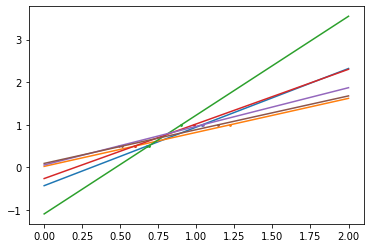

In [92]:
regr = linear_model.LinearRegression() #sets regr to the linear regression module

import matplotlib.pyplot as plt
plt.figure() 
np.random.seed(0)

for _ in range(6): 
  this_X = .1 * np.random.normal(size=(2, 1)) + X #training set
  regr.fit(this_X, y)   #fit the trainig set this_X to the target
  plt.plot(test, regr.predict(test)) #test is the training data or actaul data we are comparing the prediction to
  plt.scatter(this_X, y, s=3) 
  print(this_X)

So because we dont  have a good amount of data, for each of the points, each line is making a prediction that is exact on each one of the coordinates. We can think of this as overfitting. 

A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called Ridge regression:

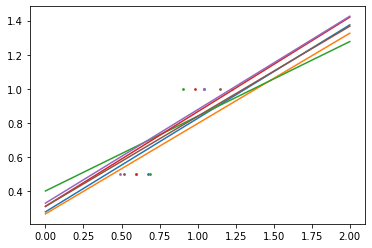

In [93]:
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)
for _ in range(6): 
  this_X = .1 * np.random.normal(size=(2, 1)) + X
  regr.fit(this_X, y)
  plt.plot(test, regr.predict(test)) 
  plt.scatter(this_X, y, s=3) 

So using rigid regression we can see that each of the lines dont exactly lie on their coordinate. The line are making a more general prediction between each points, think about Ordinary Least Square.

This is an example of bias/variance tradeoff: the larger the ridge alpha parameter, the higher the bias and the lower the variance. What is bias? Bias is how many assumptoin your model has. Higher assumptions higher bias lower variance. Where variance suggest how much our target/precidtion will change if we data change our data

We can choose alpha to minimize left out error, this time using the diabetes dataset rather than our synthetic data:

In [94]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
         .fit(diabetes_X_train, diabetes_y_train)
         .score(diabetes_X_test, diabetes_y_test)
         for alpha in alphas])

[0.5851110683883531, 0.5852073015444677, 0.5854677540698492, 0.5855512036503915, 0.5830717085554162, 0.5705899943728011]


By captureing in the fitted parameter noise that prevents the mode to generalize NEW data is known as overfitting. The bias we get form using ridge is called regularization. What is regularization?

## Saprsity

<div>
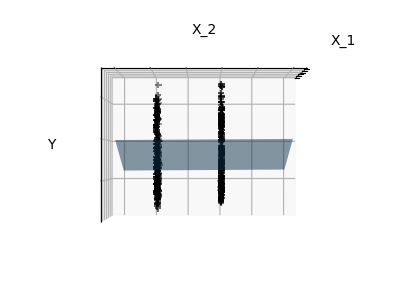
</div>
<div>
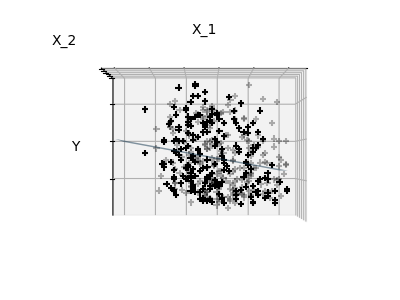
</div>
<div>
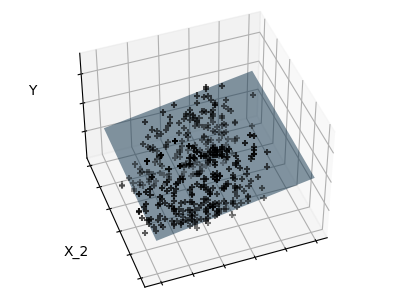 
</div>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_3d.html

You can have sparse data and you can have dense data. Sparse data is on where most of the data is comprised of zeros. Dense data is where most of the data is non-zero. There is a whole thing we can go into sparcity but for now just know that sparse data/matrix consist of mostly zero for easier computation.

"We can see that, although feature 2 has a strong coefficient on the full model, it conveys little information on y when considered with feature 1." From what I can gather, it appears that X_2 shows some type of relationship with the grouping, while X_1 is more scatter. The data used for the graphs are the same, just from different angles.

They go on to suggest "to improve the conditioning of the problem" to select informative features and set non-informative data to zero, hence sparsity. Here feature 2 is non-informative is what they are suggesting.

"Ridge regression will decrease their contribution, but not set them to zero. Another penalization approach, called Lasso (least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called sparse method and sparsity can be seen as an application of Occam’s razor: prefer simpler models."

Reading on sparcity:
https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

In [95]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
               .fit(diabetes_X_train, diabetes_y_train)
               .score(diabetes_X_test, diabetes_y_test)
           for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


## Classification
For classification problems like the iris example, a linear regression is not the right approach since we are looking to classify something not trying to find a continious value. A better way to handle this is with a sigmoid function or logistic regression.

In [99]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

## Support Vector Machines(SVM)
1) Linear (SVR) and (SVC)
<br>
2) Kernal (Linear) (Polynomial) (RBF)

### Linear (SVM)

Support Vector Machines belong to the discriminant model family: 
they try to find a combination of samples to build a linear plane maximizing the margin between the two classes. Regularization is set by the C parameter: 
a small value for C means the margin is calculated using many or all of the observations around the separating line (more regularization); 
a large value for C means the margin is calculated on observations close to the separating line (less regularization).

From the description and the graphs, SVM is a plane that hopes to maximize the maring between two classes. Regularization is a type of regression that attempts to get the coefficient estimate towards zero. This technique discourage complex models that will lead to overfitting (risk overfitting). "Regularization, significantly reduces the variance of the model, without substantial increase in its bias."

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

Your choices for SVM's are 1) SVR (support vector regression) and 2) SVC (support vector classification)

In [104]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

### Kernels

#### Linear Kernels

In [110]:
svc = svm.SVC(kernel='linear')

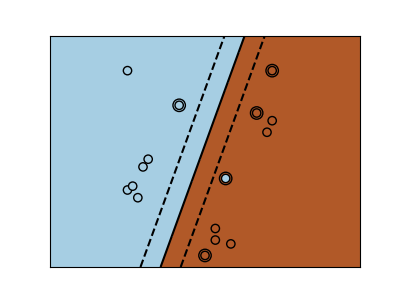

#### Polynomial kernel

In [112]:
svc = svm.SVC(kernel='poly',
              degree=3)
# degree: polynomial degree

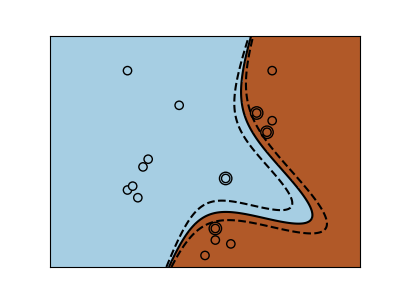

#### Polynomial kernel

In [113]:
svc = svm.SVC(kernel='rbf')
# gamma: inverse of size of
# radial kernel

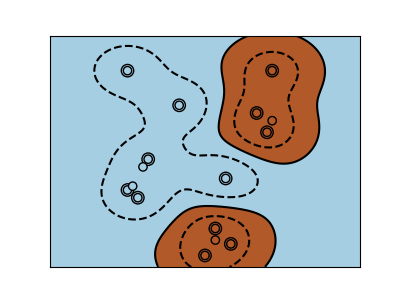

### Exercise 1

Try classifying the digits dataset with nearest neighbors and a linear model. Leave out the last 10% and test prediction performance on these observations.

from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

### Exercise 2
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.
Try classifying classes 1 and 2 from the iris dataset with SVMs, with the 2 first features. Leave out 10% of each class and test prediction performance on these observations.
<br>
Warning: the classes are ordered, do not leave out the last 10%, you would be testing on only one class. Below low is a copy paste of the anser with explaination

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

#Same as above we are first loading the iris data set
#Setting X to the data, length and width of the pedals and sepals
#Setting y to the target, which species of iris the data belongs to. Species are set to 0,1,2 for setosa', 'versicolor', 'virginica'
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Since we are looking to classify only 1 and 2 classes, versicolor and virginica we can can omit class 0, setosa
#We slice the X array where y does not equal 0, setosa
#And since we only want the first two features, we will slice everything till the second feature, :2
#From y, we want all classes that is not setosa, y != 0

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)

#Set the order for testing in our training and test
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

#Taking the first 90% of X and y as our training data
X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]

#Taking the remainder as our test data
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

#fit the model with the SVC Kernal type where Kernal type is kernal trick were we can apply nonlinear data into higher
#dimensional space making it linearly separable
#https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c

for kernel in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()